In [136]:
from src.utils import DataParser, utils
from src.detections import Detector, Tracker, KeypointDetector
from src.calculations import PlayerPosition
from ultralytics import YOLO
from mplsoccer import Pitch
import matplotlib.pyplot as plt

In [3]:
directory = '../data/SoccerNetGS/gamestate-2024/test/'
data_parser = DataParser(directory)
df = data_parser.parse_data_to_df()

Wczytywanie danych...


100%|██████████| 50/50 [00:09<00:00,  5.24it/s]


Tworzenie DataFrame...


100%|██████████| 49/49 [00:03<00:00, 15.54it/s]


In [73]:
frames = utils.load_frames_from_images(f"{directory}/SNGS-120/img1/")

In [97]:
df_single_image = df[df['image_id'] == '3120000521']
df_single_image = df_single_image[df_single_image['attributes_role'] == 'player']

In [98]:
df_single_image['bbox_pitch_x_bottom_middle'] = df_single_image['bbox_pitch_x_bottom_middle'] + 52.5
df_single_image['bbox_pitch_y_bottom_middle'] = df_single_image['bbox_pitch_y_bottom_middle'] + 34
df_single_image['bbox_pitch_y_bottom_middle'] = 68 - df_single_image['bbox_pitch_y_bottom_middle']
df_single_image

,image_id,track_id,supercategory,category_id,attributes_role,attributes_jersey,attributes_team,bbox_image_x,bbox_image_y,bbox_image_x_center,...,bbox_pitch_x_bottom_right,bbox_pitch_y_bottom_right,bbox_pitch_x_bottom_middle,bbox_pitch_y_bottom_middle,bbox_pitch_raw_x_bottom_left,bbox_pitch_raw_y_bottom_left,bbox_pitch_raw_x_bottom_right,bbox_pitch_raw_y_bottom_right,bbox_pitch_raw_x_bottom_middle,bbox_pitch_raw_y_bottom_middle
3120008543,3120000521,4,object,1,player,11,left,1538,444,1560.0,...,8.486336,1.635893,60.674895,32.357281,7.822950,1.684092,8.447947,1.673359,8.135563,1.678733
3120008544,3120000521,5,object,1,player,25,right,896,502,934.0,...,-0.145403,4.144558,51.840783,29.846181,-1.302623,4.120871,-0.261216,4.105478,-0.781983,4.113241
3120008545,3120000521,6,object,1,player,14,left,830,459,851.0,...,-1.635555,3.706637,50.539182,30.287732,-2.226622,3.650594,-1.646019,3.642232,-1.936356,3.646431
3120008546,3120000521,7,object,1,player,93,left,1732,720,1781.5,...,7.941313,18.860792,59.989716,15.115962,7.053958,19.021903,7.992576,18.988322,7.523625,19.005415
3120008547,3120000521,10,object,1,player,None,left,1584,359,1608.0,...,10.726545,-7.059766,62.839277,41.055745,9.856290,-6.838222,10.645524,-6.846544,10.251105,-6.842430
3120008548,3120000521,12,object,1,player,10,right,773,483,799.0,...,-2.112664,4.952014,49.899158,29.040009,-2.947831,4.818889,-2.245820,4.809333,-2.596892,4.814147
3120008549,3120000521,14,object,1,player,None,right,1744,358,1767.0,...,13.291195,-6.825180,65.377817,40.821684,12.459920,-6.764058,13.209412,-6.770923,12.834891,-6.767532
3120008550,3120000521,15,object,1,player,8,left,379,461,406.5,...,-7.668538,3.574247,44.477979,30.421042,-8.462495,3.522424,-7.707678,3.513321,-8.085289,3.517902
3120008552,3120000521,17,object,1,player,4,left,885,475,914.5,...,-0.599323,4.180197,51.430486,29.811226,-1.468125,3.569792,-0.650897,3.557707,-1.059557,3.563784
3120008553,3120000521,18,object,1,player,36,left,108,667,157.0,...,-8.008719,16.812325,44.050102,17.193837,-9.014973,16.814772,-8.028016,16.822165,-8.521967,16.818754


In [75]:
model = YOLO("../training/runs/detect/train4/weights/best.pt")
model_keypoints = YOLO("../training/runs/pose/train8/weights/best.pt")
detector = Detector(model, 0.5)
keypoint_detector = KeypointDetector(model_keypoints)
tracker = Tracker(detector)
positions = PlayerPosition()
tracks = tracker.track(frames)


0: 384x640 9 players, 1 goalkeeper, 50.0ms
Speed: 0.0ms preprocess, 50.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 goalkeeper, 20.2ms
Speed: 0.0ms preprocess, 20.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 ball, 1 goalkeeper, 10.0ms
Speed: 0.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 ball, 1 goalkeeper, 9.9ms
Speed: 0.0ms preprocess, 9.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 ball, 1 goalkeeper, 10.1ms
Speed: 0.0ms preprocess, 10.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 ball, 1 goalkeeper, 10.1ms
Speed: 0.0ms preprocess, 10.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 ball, 1 goalkeeper, 10.2ms
Speed: 0.0ms preprocess, 10.2ms inference, 0.0ms postprocess per image a

In [74]:
keypoints = keypoint_detector.detect(frames)


0: 384x640 1 pitch, 99.8ms
Speed: 0.0ms preprocess, 99.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 81.5ms
Speed: 10.0ms preprocess, 81.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 20.0ms
Speed: 0.0ms preprocess, 20.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 10.0ms
Speed: 0.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 10.4ms
Speed: 0.0ms preprocess, 10.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 10.0ms
Speed: 0.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 10.1ms
Speed: 5.1ms preprocess, 10.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 10.1ms
Speed: 0.0ms preprocess, 10.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

In [76]:
keypoints_list = keypoint_detector.fill_blank(frames)


0: 384x640 1 pitch, 107.3ms
Speed: 0.0ms preprocess, 107.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 75.3ms
Speed: 3.0ms preprocess, 75.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 10.2ms
Speed: 1.0ms preprocess, 10.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 12.0ms
Speed: 0.0ms preprocess, 12.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 8.0ms
Speed: 4.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 38

In [95]:
keypoints[520].show()

In [96]:
player_positions = positions.get_players_position([keypoints_list[520]], [tracks[520]])

In [130]:
player_positions[0]

array([[     36.101,      12.196],
       [     49.519,      45.264],
       [     71.197,      7.9037],
       [     58.314,      32.763],
       [     77.754,      39.946],
       [     30.892,      30.072],
       [     73.271,      40.463],
       [     49.856,      28.265],
       [     37.024,      43.091],
       [     70.335,       31.31],
       [     39.262,      30.669],
       [     51.189,      29.716],
       [     52.918,      29.088]])

In [131]:
player_positions[0][:, 0]

array([     36.101,      49.519,      71.197,      58.314,      77.754,      30.892,      73.271,      49.856,      37.024,      70.335,      39.262,      51.189,      52.918])

In [134]:
df_single_image[['bbox_pitch_x_bottom_middle', 'bbox_pitch_y_bottom_middle']]

,bbox_pitch_x_bottom_middle,bbox_pitch_y_bottom_middle
3120008543,60.674895,32.357281
3120008544,51.840783,29.846181
3120008545,50.539182,30.287732
3120008546,59.989716,15.115962
3120008547,62.839277,41.055745
3120008548,49.899158,29.040009
3120008549,65.377817,40.821684
3120008550,44.477979,30.421042
3120008552,51.430486,29.811226
3120008553,44.050102,17.193837


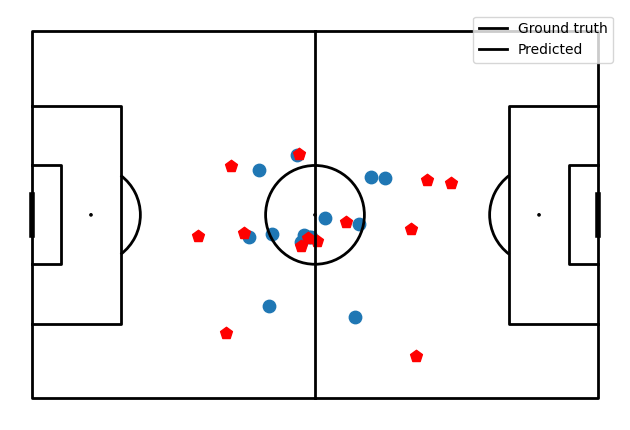

In [148]:
pitch = Pitch(pitch_type='custom', pitch_color='white', line_color='black', line_zorder=2, pitch_length=105, pitch_width=68)
fig, ax = pitch.draw()
pitch.scatter(df_single_image['bbox_pitch_x_bottom_middle'], df_single_image['bbox_pitch_y_bottom_middle'], ax=ax, s=80)
pitch.scatter(player_positions[0][:, 0], player_positions[0][:, 1], ax=ax, s=80, c='red', marker='p')
plt.savefig('../figures/position.png')